In [263]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd           # Pandas is used for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib is used for creating static, interactive, and animated plots
import seaborn as sns          # Seaborn is a data visualization library based on Matplotlib, providing a high-level interface for drawing attractive graphics

## **Loading the Dataset**

In [264]:
# Loading the dataset from an Excel file into a Pandas DataFrame
raw_df = pd.read_excel("Data analyst Data.xlsx")  # Reads the Excel file and stores it in 'raw_df'

## **Initial Observations**

In [265]:
# Display the first few rows of the dataset
raw_df.head()

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


In [266]:
# Displaying a concise summary of the DataFrame, including the data types and non-null counts
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Events                                                           4894 non-null   object 
 4   Attendee Status                                                  4894 non-null   object 
 5   College Name                                                     4879 non-null   object 
 6   How did you come to know about this event?                       2678 non-null   object 
 7   Specify in "Others" (how did you come to k

In [267]:
# Summary statistics of the dataset
raw_df.describe()

,Quantity,Year of Graduation,CGPA,Experience with python (Months),Expected salary (Lac)
count,4894.0,4894.000000,4894.000000,4894.000000,4894.000000
mean,1.0,2024.176951,8.038476,5.395586,13.935635
std,0.0,1.000180,1.005184,1.705364,6.451959
min,1.0,2023.000000,6.200000,3.000000,5.000000
25%,1.0,2023.000000,7.200000,4.000000,8.000000
50%,1.0,2024.000000,7.900000,5.000000,13.000000
75%,1.0,2025.000000,8.900000,7.000000,19.000000
max,1.0,2026.000000,9.900000,8.000000,35.000000


## **Data Cleaning**

#### *Check Null and Duplicated Entries*

In [268]:
# Checking the null values in data frame
print("duplicated entries in date_df =" , raw_df.isnull().sum())

duplicated entries in date_df = First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Events                                                                0
Attendee Status                                                       0
College Name                                                         15
How did you come to know about this event?                         2216
Specify in "Others" (how did you come to know about this event)    4805
Designation                                                           0
Year of Graduation                                                    0
City                                                                  0
CGPA                                                                  0
Experience with python (Months)                                       0
Family Income                   

In [269]:
# Checking for duplicated entries in teh dataframe
print("duplicated entries in date_df =" , raw_df.duplicated().sum())

duplicated entries in date_df = 0


#### *Cleaning and Standardising College Names Column*

In [270]:
# Drop rows where 'College Name' has null values
raw_df = raw_df.dropna(subset=['College Name'])

In [271]:
# Drop rows where 'College Name' only contains "na" (case insensitive)
raw_df = raw_df[~raw_df['College Name'].str.strip().str.lower().eq('na')]

In [272]:
# Extracting unique values from the 'College Name' column, excluding any missing values
unique_colleges = raw_df['College Name'].dropna().unique()

# Converting the unique college names into a list for easier inspection
unique_college_list = list(unique_colleges)

# Displaying the total number of unique colleges and printing each college name
print(f"Total unique colleges: {len(unique_college_list)}")  # Shows the count of unique colleges
for college in unique_college_list:
    print(college)  # Prints each unique college name

Total unique colleges: 54
D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKURDI PUNE
AP SHAH INSTITUTE OF TECHNOLOGY 
Don Bosco College of Engineering Fatorda Goa
Pillai College of Engineering New Panvel
St Xavier's College 
Vidyalankar Institute of Technology, Mumbai
S.I.E.S. Graduate School Of Technology, Nerul, Navi Mumbai
G H Raisoni institut of engineering and technology pune
GOVERNMENT POLYTECHNIC GANDHINAGAR
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan
Vishwakarma Institute of Technology, Pune
KLE Society's College of BCA, RLS Institute, Belagavi
Priyadarshini college of engineering, Nagpur 
St.Francis Institute of Technology
New horizon institute of Technology and Management 
Late G. N. Sapkal College Of Engineering
MIT Academy Of Engineering ,Alandi
A. C. Patil College of Engineering
Wilson college 
LD College of engineering, Ahmedabad, Gujarat 
DKTE Society's Textile And Engineering Institute Ichalkaranji
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVEL

In [273]:
# Converting all college names to lowercase for normalization and extracting unique values
unique_colleges = raw_df['College Name'].str.lower().unique()

# Displaying the total number of unique colleges after normalization and printing each normalized college name
print(f"Total unique colleges after normalization: {len(unique_colleges)}")  # Shows the count of normalized unique colleges
for college in unique_colleges:
    print(college)  # Prints each unique college name in lowercase

Total unique colleges after normalization: 27
d y patil institute of mca and management akurdi pune
ap shah institute of technology 
don bosco college of engineering fatorda goa
pillai college of engineering new panvel
st xavier's college 
vidyalankar institute of technology, mumbai
s.i.e.s. graduate school of technology, nerul, navi mumbai
g h raisoni institut of engineering and technology pune
government polytechnic gandhinagar
b. k. birla college of arts, science & commerce (autonomous), kalyan
vishwakarma institute of technology, pune
kle society's college of bca, rls institute, belagavi
priyadarshini college of engineering, nagpur 
st.francis institute of technology
new horizon institute of technology and management 
late g. n. sapkal college of engineering
mit academy of engineering ,alandi
a. c. patil college of engineering
wilson college 
ld college of engineering, ahmedabad, gujarat 
dkte society's textile and engineering institute ichalkaranji
thakur institute of management s

## **Data Manipulation & Transformation**

#### *Finding out Unique Entries in the data*

In [274]:
# Creating a composite key by combining the 'First Name' and 'College Name' columns in lowercase to identify duplicates
raw_df['Composite Key'] = raw_df['First Name'].str.lower() + '-' + raw_df['College Name'].str.lower()

# Displaying the first few rows of the DataFrame to verify the addition of the composite key
raw_df.head()

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills,Composite Key
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes,aniket-d y patil institute of mca and manageme...
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no,dhanshree-ap shah institute of technology
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no,dhiraj-don bosco college of engineering fatord...
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no,pooja-pillai college of engineering new panvel
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes,aayush-st xavier's college


In [275]:
# Dropping duplicate rows based on the 'Composite Key' to remove any redundant entries
raw_df = raw_df.drop_duplicates(subset='Composite Key')

# Removing the 'Composite Key' column since it's no longer needed after identifying duplicates
raw_df = raw_df.drop(columns=['Composite Key'])

# Displaying the DataFrame summary to verify the cleanup process
print(raw_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 4513 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4513 non-null   object 
 1   Email ID                                                         4513 non-null   object 
 2   Quantity                                                         4513 non-null   int64  
 3   Events                                                           4513 non-null   object 
 4   Attendee Status                                                  4513 non-null   object 
 5   College Name                                                     4513 non-null   object 
 6   How did you come to know about this event?                       2439 non-null   object 
 7   Specify in "Others" (how did you come to know a

None


In [276]:
# Dropping the 'Attendee Status' column as it is not needed for further analysis
raw_df = raw_df.drop(["Attendee Status"], axis=1)


#### *Cleaning and Standardising other columns*

In [277]:
# Extracting only the first entry before any "|" character from the 'How did you come to know about this event?' column
raw_df['How did you come to know about this event?'] = raw_df['How did you come to know about this event?'].str.split('|').str[0].str.strip()

# Removing any leading or trailing whitespace from the extracted entries
raw_df['How did you come to know about this event?'] = raw_df['How did you come to know about this event?'].str.strip()


In [278]:
# Create a mask to identify rows where the 'How did you come to know about this event?' column has the value 'Others'
mask = raw_df['How did you come to know about this event?'] == 'Others'

# Replace the 'Others' entries with the corresponding values from the 'Specify in "Others" (how did you come to know about this event)' column
raw_df.loc[mask, 'How did you come to know about this event?'] = raw_df.loc[mask, 'Specify in "Others" (how did you come to know about this event)']


In [279]:
# Standardizing entries in the 'How did you come to know about this event?' column by replacing specific values
raw_df.loc[raw_df['How did you come to know about this event?'] == 'SPOC/ College Professor', 'How did you come to know about this event?'] = 'College'
raw_df.loc[raw_df['How did you come to know about this event?'] == 'Friends', 'How did you come to know about this event?'] = 'Friend/ Classmate'
raw_df.loc[raw_df['How did you come to know about this event?'] == 'Twitter ', 'How did you come to know about this event?'] = 'Twitter'
raw_df.loc[raw_df['How did you come to know about this event?'] == 'Institute', 'How did you come to know about this event?'] = 'College'
raw_df.loc[raw_df['How did you come to know about this event?'] == 'From Academy', 'How did you come to know about this event?'] = 'College'
raw_df.loc[raw_df['How did you come to know about this event?'] == 'Team entity', 'How did you come to know about this event?'] = 'Not Specified'
raw_df.loc[raw_df['How did you come to know about this event?'] == 'Yuva Sena/Shiv Sena', 'How did you come to know about this event?'] = 'Not Specified'


In [280]:
# Extracting unique values from the 'How did you come to know about this event?' column to see the distinct entries
unique_invitee = raw_df["How did you come to know about this event?"].unique()

# Displaying the unique values
unique_invitee


array(['Email', 'College', 'Instagram', 'Whatsapp', 'LinkedIn', nan,
       'Cloud Counselage Website', 'Youtube', 'Facebook',
       'Friend/ Classmate', 'Telegram', 'Twitter', 'Not Specified'],
      dtype=object)

In [281]:
# Replacing missing values in the 'How did you come to know about this event?' column with 'Not Specified'
raw_df['How did you come to know about this event?'] = raw_df['How did you come to know about this event?'].fillna('Not Specified')


In [282]:
# Dropping the 'Specify in "Others" (how did you come to know about this event)' column as it's no longer needed
raw_df = raw_df.drop('Specify in "Others" (how did you come to know about this event)', axis=1)


#### *Cleaning and Standardising Income column*

In [283]:
# Extracting unique values from the 'Family Income' column to see the distinct income categories
unique_incomes = raw_df["Family Income"].unique()

# Displaying the unique values
unique_incomes


array(['7 Lakh+', '0-2 Lakh', '5-7 Lakh', '2-5 Lakh'], dtype=object)

In [284]:
# Converting 'Family Income' ranges to their average values for numerical analysis
raw_df.loc[raw_df['Family Income'] == '0-2 Lakh', 'Family Income'] = 1     # Assigning 1 lakh for the '0-2 Lakh' range
raw_df.loc[raw_df['Family Income'] == '2-5 Lakh', 'Family Income'] = 3.5   # Assigning 3.5 lakh for the '2-5 Lakh' range
raw_df.loc[raw_df['Family Income'] == '5-7 Lakh', 'Family Income'] = 6     # Assigning 6 lakh for the '5-7 Lakh' range
raw_df.loc[raw_df['Family Income'] == '7 Lakh+', 'Family Income'] = 10      # Assigning 10 lakh for the '7 Lakh+' range

# Converting the 'Family Income' column to float type for numerical computations
raw_df['Family Income'] = raw_df['Family Income'].astype(float)


In [285]:
# Assigning the cleaned DataFrame to a new variable for saving
cleaned_df = raw_df

# Saving the cleaned DataFrame to a CSV file without including the index
# cleaned_df.to_csv('cleaned_dataset_new.csv', index=False)


In [286]:
# Displaying a concise summary of the DataFrame, including the data types and non-null counts
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4513 entries, 0 to 4893
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   First Name                                  4513 non-null   object 
 1   Email ID                                    4513 non-null   object 
 2   Quantity                                    4513 non-null   int64  
 3   Events                                      4513 non-null   object 
 4   College Name                                4513 non-null   object 
 5   How did you come to know about this event?  4513 non-null   object 
 6   Designation                                 4513 non-null   object 
 7   Year of Graduation                          4513 non-null   int64  
 8   City                                        4513 non-null   object 
 9   CGPA                                        4513 non-null   float64
 10  Experience with p

## **Exploratory Data Analysis**

In [287]:
# 1. How many unique students are there?

# Counting the total number of students (rows) in the cleaned DataFrame
unique_students = len(cleaned_df)

# Displaying the total count of students
print(f"Unique students: {unique_students}")


Unique students: 4513


In [288]:
# 2. How many events were organized?

# Getting the unique events organized based on the 'Events' column
unique_events = cleaned_df['Events'].unique()

# Displaying the unique events
print(f"Unique events organized:")
for event in unique_events:
    print(event)


Unique events organized:
Art of Resume Building
Data Visualization using Power BI
Artificial Intelligence
Hello ML and DL
Product Marketing
IAC - Q&A
Internship Program(IP) Success Conclave
IS DATA SCIENCE FOR YOU?
KYC - Know Your CCPC
Product Design & Full Stack
RPA: A Boon or A Bane
Skill and Employability Enhancement
Talk on Skill and Employability Enhancement
The Agile Ways of Working
The SDLC & their transformations
Transformation with DevOps: The Easy Way


In [289]:
# 3. How many unique colleges are the students from?

# Counting the number of unique colleges based on the 'College Name' column
unique_colleges = cleaned_df['College Name'].nunique()

# Displaying the count of unique colleges
print(f"Unique colleges: {unique_colleges}")

# Getting the top 5 colleges by student count
top_5_colleges = cleaned_df['College Name'].value_counts().head(5)

# Displaying the top 5 colleges with their student counts
print("Top 5 colleges by student count:")
top_5_colleges = top_5_colleges.reset_index()
top_5_colleges


Unique colleges: 54
Top 5 colleges by student count:


,College Name,count
0,"priyadarshini college of engineering, nagpur",229
1,"ld college of engineering, ahmedabad, gujarat",220
2,"vidyalankar institute of technology, mumbai",220
3,"b. k. birla college of arts, science & commerc...",190
4,government polytechnic gandhinagar,187


In [290]:
# 4. How many unique cities are the students from?

# Counting the number of unique cities based on the 'City' column
unique_cities = cleaned_df['City'].nunique()

# Displaying the count of unique cities
print(f"Unique cities: {unique_cities}")

# Getting the top 5 cities by student count
top_5_cities = cleaned_df['City'].value_counts().head(5)

# Displaying the top 5 cities with their student counts
print("Top 5 cities by student count:")
top_5_cities = top_5_cities.reset_index()
top_5_cities

Unique cities: 177
Top 5 cities by student count:


,City,count
0,Chandigarh,53
1,Talmuk,53
2,Siuri,51
3,Bikaner,51
4,Gonda,51


In [291]:
# 5. What is the distribution of year of graduation?

# Getting the distribution of 'Year of Graduation' by counting occurrences and sorting by year
graduation_year_distribution = cleaned_df['Year of Graduation'].value_counts().sort_index()

# Displaying the distribution of the year of graduation
print("Distribution of year of graduation:")
graduation_year_distribution = graduation_year_distribution.reset_index()
graduation_year_distribution


Distribution of year of graduation:


,Year of Graduation,count
0,2023,1415
1,2024,1393
2,2025,1191
3,2026,514


In [292]:
# 6. What is the average CGPA?

# Calculating the average CGPA from the 'CGPA' column
average_cgpa = cleaned_df['CGPA'].mean()

# Displaying the average CGPA, formatted to 2 decimal places
print(f"Average CGPA: {average_cgpa:.2f}")


Average CGPA: 8.05


In [293]:
# 7. What is the average experience in python (months)?

# Calculating the average experience in Python (in months) from the 'Experience with python (Months)' column
average_python_experience = cleaned_df['Experience with python (Months)'].mean()

# Displaying the average Python experience, formatted to 2 decimal places
print(f"Average experience in Python (months): {average_python_experience:.2f}")


Average experience in Python (months): 5.37


In [294]:
# 8. What is the average family income (lac)?

# Calculating the average family income (in lakhs) from the 'Family Income' column
average_family_income = cleaned_df['Family Income'].mean()

# Displaying the average family income, formatted to 2 decimal places
print(f"Average family income (Lakh): {average_family_income:.2f}")


Average family income (Lakh): 1.34


In [295]:
# 9. How many students have leadership positions in their college? (count of unique students who said yes to leadership skills)

# Counting the number of unique students who reported having leadership positions
# Filtering rows where 'Leadership- skills' is 'yes' (case insensitive) and counting unique 'Email ID's
leadership_count = cleaned_df[cleaned_df['Leadership- skills'].str.lower() == 'yes']['Email ID'].nunique()

# Displaying the count of students with leadership positions
print(f"Students with leadership positions: {leadership_count}")


Students with leadership positions: 1056


In [296]:
# 10. What is the average expected salary?

# Calculating the average expected salary (in lakhs) from the 'Expected salary (Lac)' column
average_expected_salary = cleaned_df['Expected salary (Lac)'].mean()

# Displaying the average expected salary, formatted to 2 decimal places
print(f"Average expected salary (Lac): {average_expected_salary:.2f}")


Average expected salary (Lac): 13.95


## **Objective: Basic Questions**

**1. How many unique students are included in the dataset?**

In [297]:
# Counting the total number of students (rows) in the cleaned DataFrame
unique_students = len(cleaned_df)

# Displaying the total count of students
print(f"Unique students: {unique_students}")


Unique students: 4513


**2. What is the average GPA of the students?**

In [298]:
# Calculating the average GPA (CGPA) from the 'CGPA' column
average_gpa = cleaned_df['CGPA'].mean()

# Displaying the average GPA, formatted to 2 decimal places
print(f"Average GPA: {average_gpa:.2f}")


Average GPA: 8.05


**3. What is the distribution of students across different graduation years?**

,Year of Graduation,count
0,2023,1415
1,2024,1393
2,2025,1191
3,2026,514


C:\Users\patil\AppData\Local\Temp\ipykernel_14048\3818869118.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=graduation_year_distribution.index, y=graduation_year_distribution.values, palette="viridis")


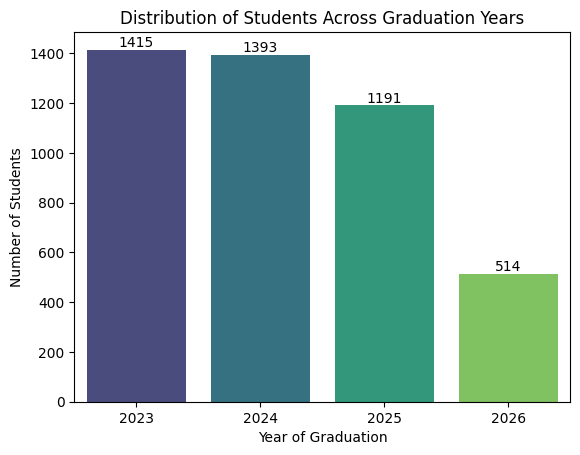

In [313]:
# Getting the distribution of 'Year of Graduation' by counting occurrences and sorting by year
graduation_year_distribution = cleaned_df['Year of Graduation'].value_counts().sort_index()

display(graduation_year_distribution.reset_index())

# Creating a bar plot using seaborn with a 'viridis' color palette
ax = sns.barplot(x=graduation_year_distribution.index, y=graduation_year_distribution.values, palette="viridis")

# Setting the title of the plot
ax.set_title('Distribution of Students Across Graduation Years')

# Setting the x-axis label
ax.set_xlabel('Year of Graduation')

# Setting the y-axis label
ax.set_ylabel('Number of Students')

# Adding data labels on top of each bar in the bar plot
for i in ax.containers:
    ax.bar_label(i)


**4. What is the distribution of student's experience with Python programming?**

,Experience with python (Months),count
0,3,936
1,4,452
2,5,1153
3,6,649
4,7,624
5,8,699


C:\Users\patil\AppData\Local\Temp\ipykernel_14048\4009650987.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=python_experience_distribution.index, y=python_experience_distribution.values, palette="viridis")


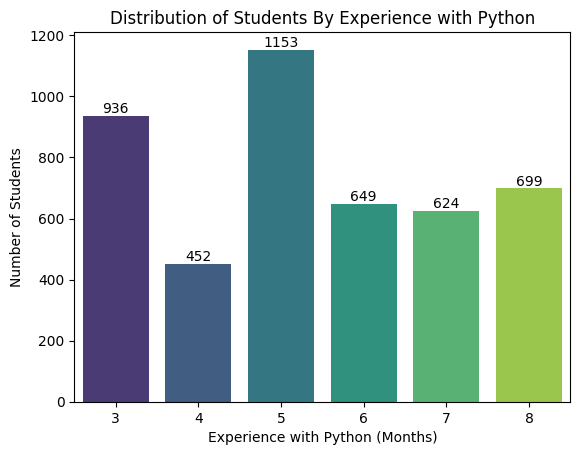

In [315]:
# Extracting the distribution of 'Experience with Python (Months)' from the cleaned dataset
python_experience_distribution = cleaned_df['Experience with python (Months)'].value_counts().sort_index()

display(python_experience_distribution.reset_index())

# Creating a bar plot using seaborn with a 'viridis' color palette
ax = sns.barplot(x=python_experience_distribution.index, y=python_experience_distribution.values, palette="viridis")

# Setting the title of the plot
ax.set_title('Distribution of Students By Experience with Python')

# Setting the x-axis label
ax.set_xlabel('Experience with Python (Months)')

# Setting the y-axis label
ax.set_ylabel('Number of Students')

# Adding data labels on top of each bar in the bar plot
for i in ax.containers:
    ax.bar_label(i)



**5. What is the average family income of the students?**

In [316]:
# Calculating the average family income from the 'Family Income' column
average_family_income = cleaned_df['Family Income'].mean()

# Printing the average family income rounded to two decimal places, with the unit in Lakhs
print(f"Average Family Income: {average_family_income:.2f} Lakh")


Average Family Income: 1.34 Lakh


**6. How does the GPA vary between different colleges? (Show top 5 results only)**

In [317]:
# Calculate the top 5 colleges by average CGPA
top_5_colleges_gpa = cleaned_df.groupby('College Name')['CGPA'].mean().sort_values(ascending=False).head(5)

# Convert the series into a DataFrame for better representation
top_5_colleges_gpa_df = top_5_colleges_gpa.reset_index()

# Rename the columns for better readability
top_5_colleges_gpa_df.columns = ['College Name', 'Average GPA']

# Print the list of top 5 colleges based on GPA
print("Top 5 colleges by GPA:")

# Display the DataFrame in a table format
display(top_5_colleges_gpa_df)


Top 5 colleges by GPA:


,College Name,Average GPA
0,"THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER...",8.585714
1,St Xavier's College,8.578571
2,"B. K. Birla College of Arts, Science & Commerc...",8.456410
3,"MIT Academy Of Engineering ,Alandi",8.333333
4,"Symbiosis Institute of Technology, Pune",8.303448


**7. Are there any outliers in the quantity (number of courses completed) attribute?**

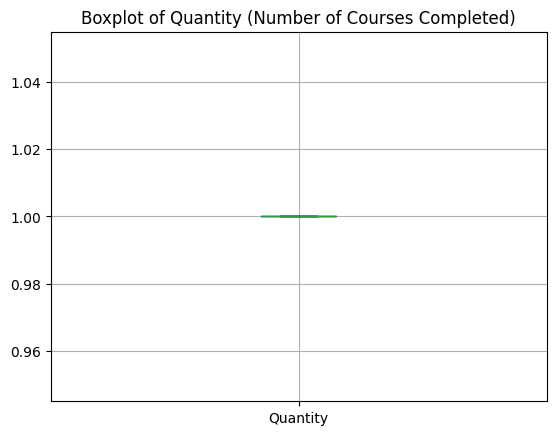

In [318]:
# Create a boxplot for the 'Quantity' column
cleaned_df.boxplot(column='Quantity')

# Add a title to the plot
plt.title('Boxplot of Quantity (Number of Courses Completed)')

# Display the plot
plt.show()


**8. What is the average GPA of students from each city? (Show top 5 results only)**

Top 5 cities by Average GPA:


,City,Average GPA
0,Kolhapur,8.592308
1,Hasan,8.491667
2,Siwan,8.484615
3,Sonipat,8.464286
4,Puri,8.461538
5,Gurugram,8.450000
6,Srinagar,8.435714
7,Delhi,8.414286
8,Haijipur,8.400000
9,Raipur,8.400000


C:\Users\patil\AppData\Local\Temp\ipykernel_14048\3219271564.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Average GPA', y='City', data=top_5_cities_gpa_df, palette="viridis")


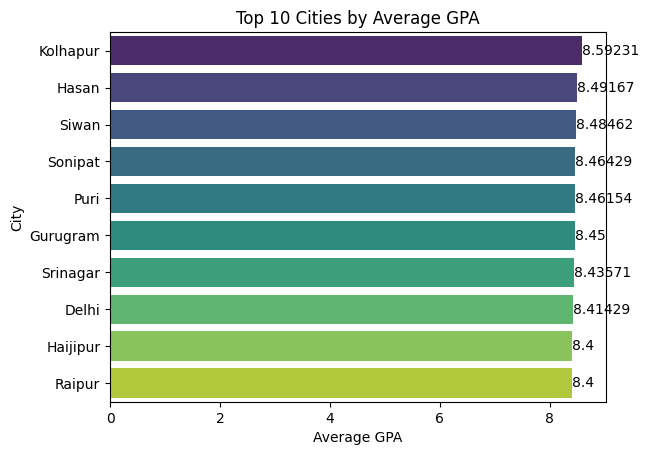

In [335]:
# Group by 'City' and calculate the average CGPA, then sort in descending order and take top 5
top_5_cities_gpa = cleaned_df.groupby('City')['CGPA'].mean().sort_values(ascending=False).head(10)
print("Top 5 cities by Average GPA:")

# Reset the index and create a DataFrame for easier plotting and display
top_5_cities_gpa_df = top_5_cities_gpa.reset_index()
top_5_cities_gpa_df.columns = ['City', 'Average GPA']

# Display the DataFrame
display(top_5_cities_gpa_df)

# Plot the data in a bar plot
ax = sns.barplot(x='Average GPA', y='City', data=top_5_cities_gpa_df, palette="viridis")

# Set the title and axis labels for the plot
ax.set_title('Top 10 Cities by Average GPA')
ax.set_xlabel('Average GPA')
ax.set_ylabel('City')

# Adding data labels on top of each bar in the bar plot
for i in ax.containers:
    ax.bar_label(i)


**9. Can we identify any relationship between family income and GPA?**

C:\Users\patil\AppData\Local\Temp\ipykernel_14048\3097595507.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Family Income', y='CGPA', data=cleaned_df, palette="viridis")


Text(0, 0.5, 'GPA')

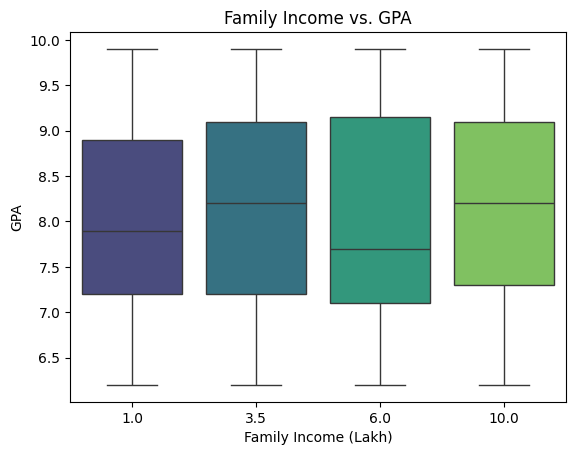

In [346]:
# Create a boxplot to visualize the distribution of GPA across Family Income
ax = sns.boxplot(x='Family Income', y='CGPA', data=cleaned_df, palette="viridis")

# Set the title and axis labels for the plot
ax.set_title('Family Income vs. GPA')
ax.set_xlabel('Family Income (Lakh)')
ax.set_ylabel('GPA')


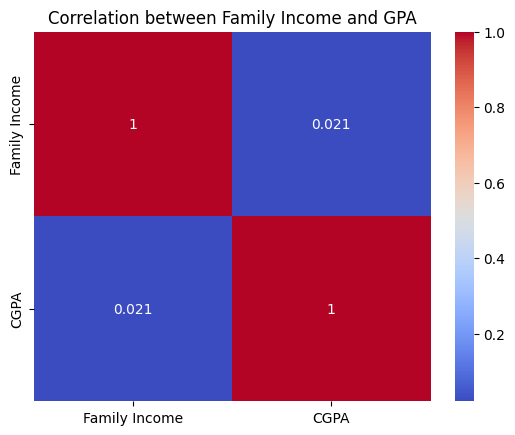

In [330]:
corr = cleaned_df[['Family Income', 'CGPA']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Family Income and GPA')
plt.show()


## **Objective: Moderate Questions**

**10. How many students are from various cities? (Show top 5 results only)**

In [336]:
# Top 5 cities by student count
top_5_cities_count = cleaned_df['City'].value_counts().head(10)
print("Top 5 cities by student count:")

# Display the top 5 cities in table format
top_5_cities_count_df = top_5_cities_count.reset_index()
top_5_cities_count_df.columns = ['City', 'Number of Students']
display(top_5_cities_count_df)


Top 5 cities by student count:


,City,Number of Students
0,Chandigarh,53
1,Talmuk,53
2,Siuri,51
3,Bikaner,51
4,Gonda,51
5,Jalor,51
6,Kalyan,50
7,Jodhpur,50
8,Buldhana,49
9,Dhule,49


**11. How does the expected salary vary based on factors like 'GPA', 'Family income', 'Experience with python (Months)'?**

C:\Users\patil\AppData\Local\Temp\ipykernel_14048\1070584976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='CGPA', y='Expected salary (Lac)', data=cleaned_df, palette="viridis")


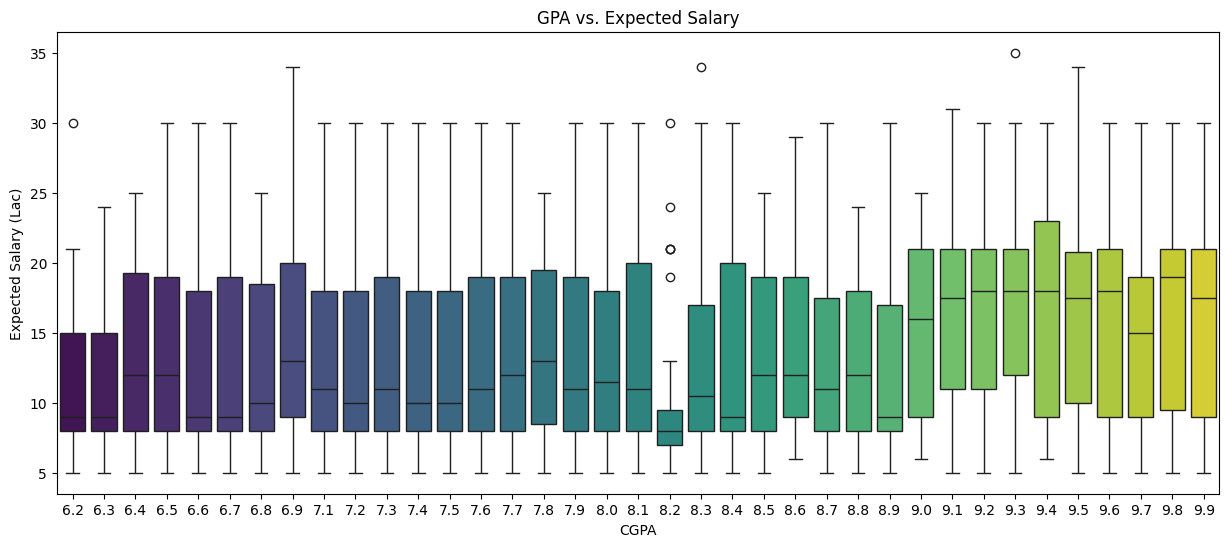

In [109]:
# CGPA vs Expected Salary boxplot
plt.figure(figsize=(15, 6))
ax = sns.boxplot(x='CGPA', y='Expected salary (Lac)', data=cleaned_df, palette="viridis")
ax.set_title('GPA vs. Expected Salary')
ax.set_xlabel('CGPA')
ax.set_ylabel('Expected Salary (Lac)')

# Show the plot
plt.show()


C:\Users\patil\AppData\Local\Temp\ipykernel_14048\2211729535.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Family Income', y='Expected salary (Lac)', data=cleaned_df, palette="viridis")


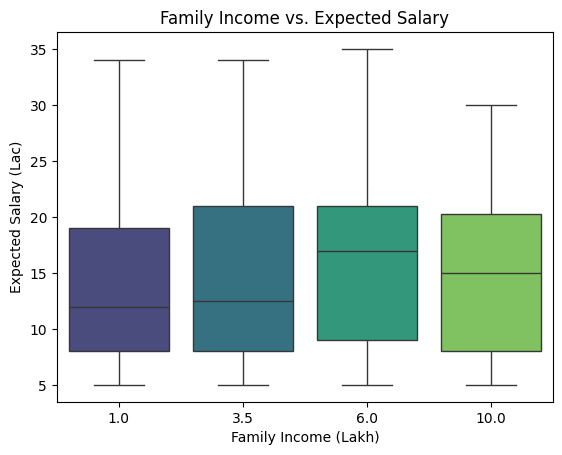

In [110]:
# Family Income vs Expected Salary boxplot
ax = sns.boxplot(x='Family Income', y='Expected salary (Lac)', data=cleaned_df, palette="viridis")
ax.set_title('Family Income vs. Expected Salary')
ax.set_xlabel('Family Income (Lakh)')
ax.set_ylabel('Expected Salary (Lac)')

# Show the plot
plt.show()


C:\Users\patil\AppData\Local\Temp\ipykernel_14048\2138831263.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Experience with python (Months)', y='Expected salary (Lac)', data=cleaned_df, palette="viridis")


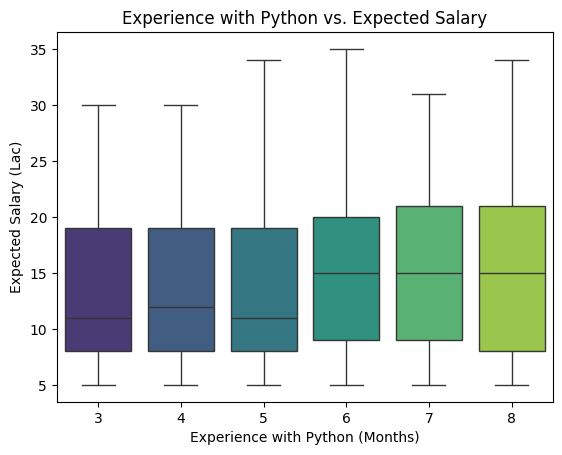

In [111]:
# Experience with Python vs. Expected Salary
ax = sns.boxplot(x='Experience with python (Months)', y='Expected salary (Lac)', data=cleaned_df, palette="viridis")
ax.set_title('Experience with Python vs. Expected Salary')
ax.set_xlabel('Experience with Python (Months)')
ax.set_ylabel('Expected Salary (Lac)')

plt.show()


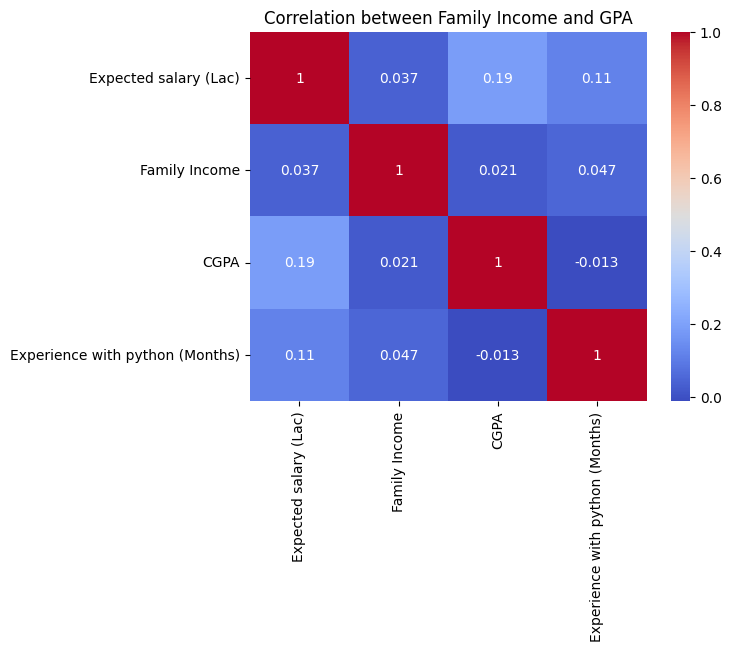

In [341]:
corr = cleaned_df[['Expected salary (Lac)', 'Family Income', 'CGPA', 'Experience with python (Months)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Family Income and GPA')
plt.show()


**12. Which event tends to attract more students from specific fields of study? (student distribution according to event)**

Student distribution according to event:


,Events,Number of Students
0,Internship Program(IP) Success Conclave,788
1,Product Design & Full Stack,714
2,Art of Resume Building,465
3,Data Visualization using Power BI,432
4,Talk on Skill and Employability Enhancement,347
5,IS DATA SCIENCE FOR YOU?,284
6,Skill and Employability Enhancement,267
7,Hello ML and DL,260
8,KYC - Know Your CCPC,184
9,IAC - Q&A,146


C:\Users\patil\AppData\Local\Temp\ipykernel_14048\3715909773.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Number of Students', y='Events', data=event_distribution_df, palette="viridis")


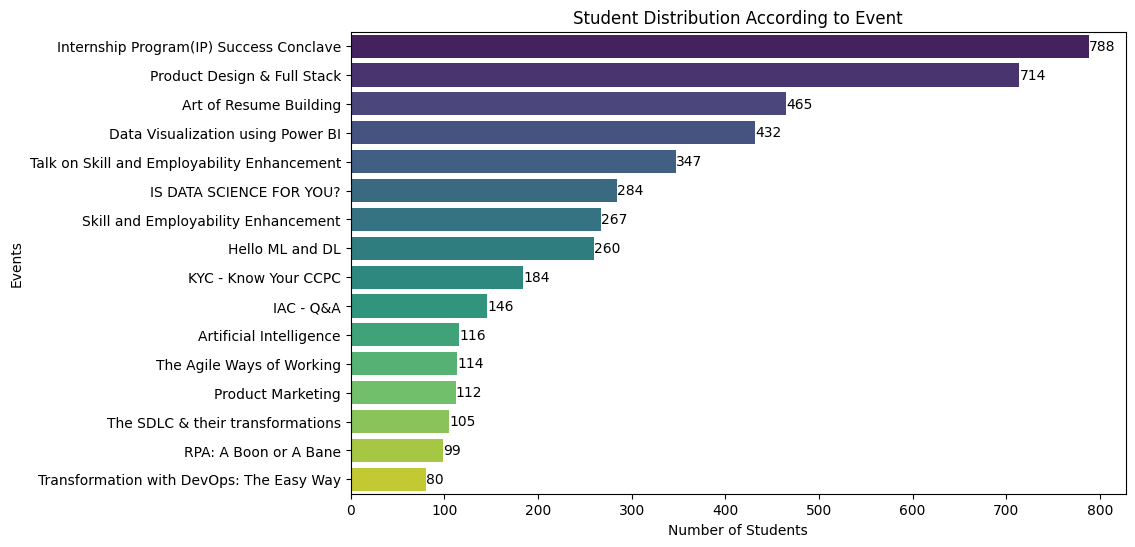

In [342]:
# Count the number of students for each event
event_distribution = cleaned_df['Events'].value_counts()
print("Student distribution according to event:")

# Convert the distribution to a DataFrame
event_distribution_df = event_distribution.reset_index()
event_distribution_df.columns = ['Events', 'Number of Students']
display(event_distribution_df)

# Plot the distribution
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Number of Students', y='Events', data=event_distribution_df, palette="viridis")
ax.set_title('Student Distribution According to Event')
ax.set_xlabel('Number of Students')
ax.set_ylabel('Events')

# Adding data labels on top of each bar in the bar plot
for i in ax.containers:
    ax.bar_label(i)


**13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?**

C:\Users\patil\AppData\Local\Temp\ipykernel_14048\3513002340.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([leadership_gpa, no_leadership_gpa], labels=['Leadership', 'No Leadership'])


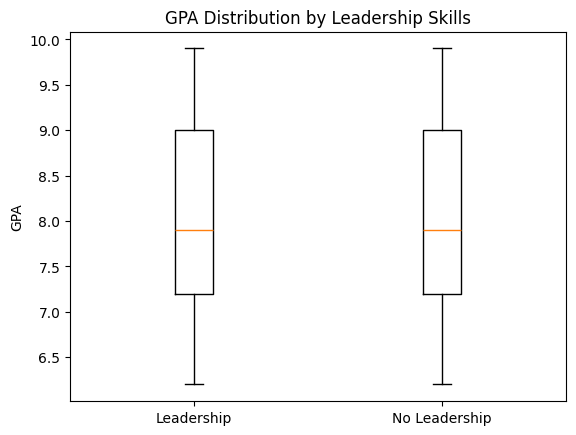

C:\Users\patil\AppData\Local\Temp\ipykernel_14048\3513002340.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([leadership_salary, no_leadership_salary], labels=['Leadership', 'No Leadership'])


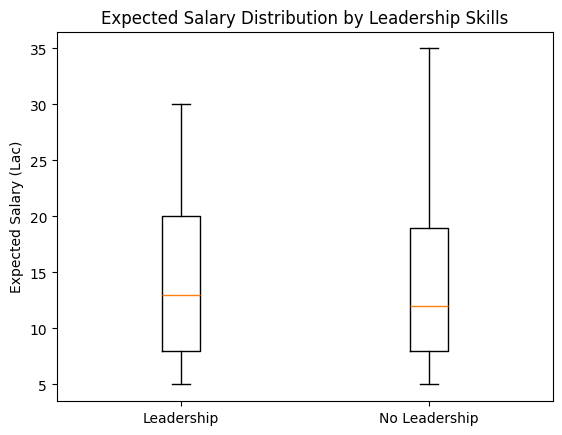

In [113]:
# Box plot for GPA distribution by Leadership Skills
leadership_gpa = cleaned_df[cleaned_df['Leadership- skills'].str.lower() == 'yes']['CGPA']
no_leadership_gpa = cleaned_df[cleaned_df['Leadership- skills'].str.lower() == 'no']['CGPA']

plt.boxplot([leadership_gpa, no_leadership_gpa], labels=['Leadership', 'No Leadership'])
plt.title('GPA Distribution by Leadership Skills')
plt.ylabel('GPA')
plt.show()

# Box plot for Expected Salary distribution by Leadership Skills
leadership_salary = cleaned_df[cleaned_df['Leadership- skills'].str.lower() == 'yes']['Expected salary (Lac)']
no_leadership_salary = cleaned_df[cleaned_df['Leadership- skills'].str.lower() == 'no']['Expected salary (Lac)']

plt.boxplot([leadership_salary, no_leadership_salary], labels=['Leadership', 'No Leadership'])
plt.title('Expected Salary Distribution by Leadership Skills')
plt.ylabel('Expected Salary (Lac)')
plt.show()


**14. How many students are graduating by the end of 2024?**

In [348]:
# Count the number of unique students graduating by the end of 2024
graduating_by_2024 = cleaned_df[cleaned_df['Year of Graduation'] <= 2024]
print(f"Students graduating by the end of 2024: {len(graduating_by_2024)}")


Students graduating by the end of 2024: 2808


**15. Which promotion channel brings in more student participation for the event?**

Distribution of students according to promotion channel:


,Promotion Channel,Number of Students
0,Not Specified,2152
1,Whatsapp,1099
2,Email,440
3,College,351
4,Cloud Counselage Website,131
5,Youtube,112
6,LinkedIn,70
7,Facebook,50
8,Instagram,46
9,Friend/ Classmate,43


C:\Users\patil\AppData\Local\Temp\ipykernel_14048\3558521731.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Number of Students', y='Promotion Channel', data=promotion_channel_df, palette="viridis")


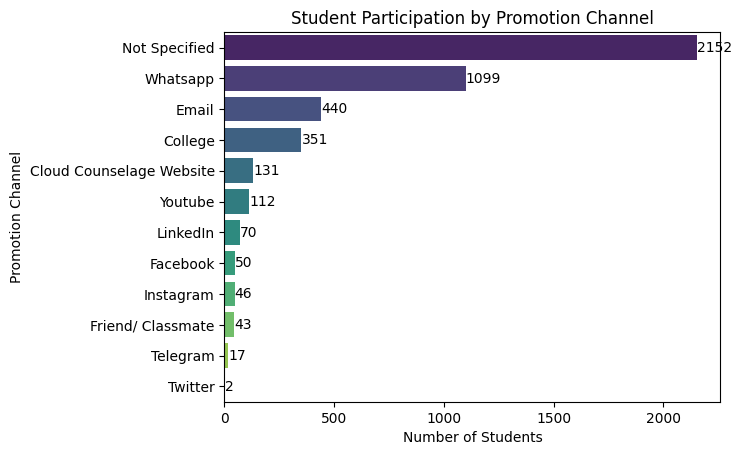

In [344]:
# Count the number of students for each promotion channel
promotion_channel_distribution = cleaned_df['How did you come to know about this event?'].value_counts()
print("Distribution of students according to promotion channel:")

# Create a DataFrame to display the distribution in table format
promotion_channel_df = promotion_channel_distribution.reset_index()
promotion_channel_df.columns = ['Promotion Channel', 'Number of Students']
display(promotion_channel_df)

# Plot the distribution of students by promotion channel
# plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Number of Students', y='Promotion Channel', data=promotion_channel_df, palette="viridis")
ax.set_title('Student Participation by Promotion Channel')
ax.set_xlabel('Number of Students')
ax.set_ylabel('Promotion Channel')

# Adding data labels on top of each bar in the bar plot
for i in ax.containers:
    ax.bar_label(i)


**16. Find the total number of students who attended the events related to Data Science?**

In [352]:
# List of Data Science-related events
data_science_events = ['Data Visualization using Power BI', 'Artificial Intelligence', 'Hello ML and DL', 'IS DATA SCIENCE FOR YOU?']

# Filter the DataFrame to include only the rows where the 'Events' column matches any of the Data Science events
data_science_students_df = cleaned_df[cleaned_df['Events'].isin(data_science_events)]

# Count the number of unique students (based on 'Email ID') who attended the Data Science events
data_science_students = len(data_science_students_df)

# Print the total number of unique students who attended Data Science events
print(f"Total number of students who attended Data Science events: {data_science_students}")


Total number of students who attended Data Science events: 1092


**17. Those students who have high CGPA & more experience in python also have high expectations for salary? (Avg)**

In [118]:
# Filter students with CGPA of 8 or above and Python experience of 8 months or more
high_cgpa_experience = cleaned_df[
    (cleaned_df['CGPA'] >= 8) & (cleaned_df['Experience with python (Months)'] >= 8)
]

# Calculate the average expected salary for the filtered students
average_expected_salary_high = high_cgpa_experience['Expected salary (Lac)'].mean()

# Print the average expected salary for students with high CGPA and significant Python experience
print(f"Average expected salary for students with high CGPA and more Python experience: {average_expected_salary_high:.2f} Lac")


Average expected salary for students with high CGPA and more Python experience: 17.06 Lac


**18. How many students know about the event from their colleges? Which of these Top 5 colleges?**

Students who knew about the event from their colleges: 351
Top 5 colleges by students who knew about the event from their colleges:


,College Name,Number of Students
0,"ld college of engineering, ahmedabad, gujarat",18
1,"vidyalankar institute of technology, mumbai",18
2,"kle society's college of bca, rls institute, b...",18
3,"mit academy of engineering ,alandi",18
4,wilson college,16


C:\Users\patil\AppData\Local\Temp\ipykernel_14048\3740738384.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Number of Students', y='College Name', data=college_promotion_df, palette="viridis")


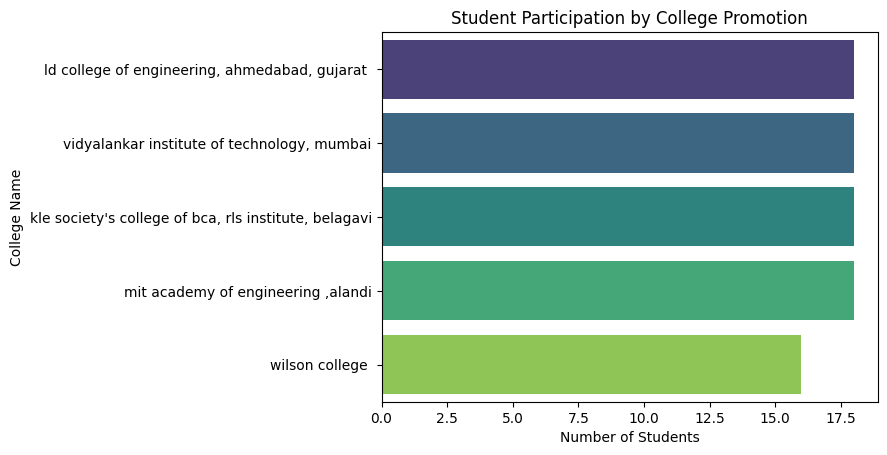

In [355]:
# Count the number of unique students who learned about the event from their colleges
college_promotion_distribution = cleaned_df[cleaned_df['How did you come to know about this event?'].str.contains('college', case=False, na=False)]
print(f"Students who knew about the event from their colleges: {len(college_promotion_distribution)}")

# Get the top 5 colleges by the number of students who learned about the event from their colleges
top_5_colleges_promotion = college_promotion_distribution['College Name'].value_counts().head(5)
print("Top 5 colleges by students who knew about the event from their colleges:")

# Create a DataFrame for the top 5 colleges with the number of students
college_promotion_df = top_5_colleges_promotion.reset_index()
college_promotion_df.columns = ['College Name', 'Number of Students']
display(college_promotion_df)

# Plot the number of students from the top 5 colleges who knew about the event through their colleges
# plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Number of Students', y='College Name', data=college_promotion_df, palette="viridis")
ax.set_title('Student Participation by College Promotion')
ax.set_xlabel('Number of Students')
ax.set_ylabel('College Name')
plt.show()


----*END*----